In [1]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# predicting between airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck

Using TensorFlow backend.


In [2]:
print('x_train shape:', x_train.shape)

x_train shape: (50000, 32, 32, 3)


In [3]:
print('y_train shape:', y_train.shape)

y_train shape: (50000, 1)


In [4]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


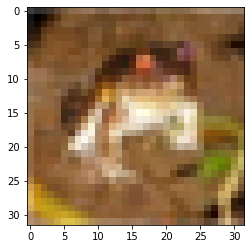

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
img = plt.imshow(x_train[0])

In [6]:
print('The label is:', y_train[0])

The label is: [6]


In [7]:
import keras
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)
print('The one hot label is:', y_train_one_hot[1])

The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)         

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=32, epochs=20, 
           validation_split=0.2)


Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 322s 8ms/step - loss: 1.5516 - accuracy: 0.4291 - val_loss: 1.1721 - val_accuracy: 0.5808
Epoch 2/20
40000/40000 [==============================] - 326s 8ms/step - loss: 1.1287 - accuracy: 0.5971 - val_loss: 0.9345 - val_accuracy: 0.6714
Epoch 3/20
40000/40000 [==============================] - 323s 8ms/step - loss: 0.9601 - accuracy: 0.6609 - val_loss: 0.8561 - val_accuracy: 0.7055
Epoch 4/20
40000/40000 [==============================] - 322s 8ms/step - loss: 0.8525 - accuracy: 0.7009 - val_loss: 0.8322 - val_accuracy: 0.7141
Epoch 5/20
40000/40000 [==============================] - 325s 8ms/step - loss: 0.7829 - accuracy: 0.7247 - val_loss: 0.7813 - val_accuracy: 0.7277
Epoch 6/20
40000/40000 [==============================] - 323s 8ms/step - loss: 0.7217 - accuracy: 0.7446 - val_loss: 0.7355 - val_accuracy: 0.7422
Epoch 7/20
40000/40000 [==============================] - 324

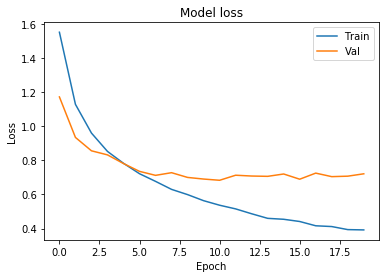

In [13]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

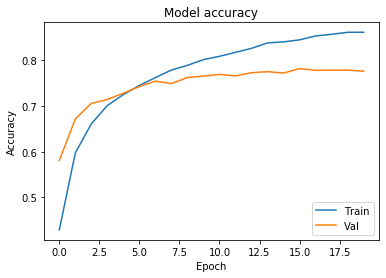

In [15]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [16]:
model.evaluate(x_test, y_test_one_hot)[1]

10000/10000 [==============================] - 26s 3ms/step


0.775600016117096

In [17]:
model.save('my_cifar10_model.h5')

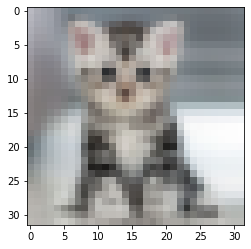

In [18]:
my_image = plt.imread("cat.jpg")
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3))
img = plt.imshow(my_image_resized)

In [19]:
import numpy as np
probabilities = model.predict(np.array( [my_image_resized,] ))

In [20]:
probabilities

array([[8.4659327e-03, 3.6817055e-05, 5.7420183e-02, 1.8496326e-01,
        7.4537061e-02, 1.6967444e-01, 1.5756710e-01, 3.4472984e-01,
        2.0604872e-03, 5.4486265e-04]], dtype=float32)

In [21]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities[0,index[5]])

Most likely class: horse -- Probability: 0.34472984
Second most likely class: cat -- Probability: 0.18496326
Third most likely class: dog -- Probability: 0.16967444
Fourth most likely class: frog -- Probability: 0.1575671
Fifth most likely class: deer -- Probability: 0.07453706


Most likely class: truck -- Probability: 0.7872322
Second most likely class: automobile -- Probability: 0.21269636
Third most likely class: ship -- Probability: 6.669617e-05
Fourth most likely class: airplane -- Probability: 4.771952e-06
Fifth most likely class: frog -- Probability: 2.4582155e-12


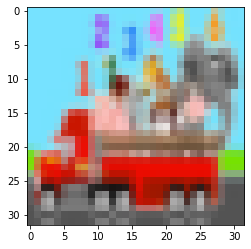

In [22]:
my_image = plt.imread("index.jpg")
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3))
img = plt.imshow(my_image_resized)
probabilities = model.predict(np.array( [my_image_resized,] ))
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities[0,index[5]])